# Final Project

Rongyu Lin, Dylan Penn,  Rose Miao, Simon Liu

# **STEP 1: Use the data given to create an model where demand = function (price, other features). 
**

Modeling of demand.

Here, for simplicity, we only consider demand as a function of price. We use both LinearRgression and Polynomial function to model the demand function. 

In [30]:
#import necessary libraries
!pip install autogluon
import numpy as np
import pandas as pd
import sys
import itertools
import matplotlib.pyplot as plt
import math
import time


#load data
journeys = pd.read_csv('journeys.csv')
utilization = pd.read_csv('utilization.csv')

#have a look at the data
journeys

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Trip ID Hash,Car ID Hash,Car Parking Address Postcode,Car Parking Address City,Trip Start At Local Time,Trip End At Local Time,Trip Created At Local Time,Trip Sum Trip Price
0,00010247034d28272cf5e1e16b43f52f,9ddac6a5fb0b3962db3b2f42fd31d3f9,94110,San Francisco,11/14/17 22:15,11/15/17 2:15,11/14/17 20:32,$20.00
1,0001556e5d28e66b3318e89c094186c4,0f386ec90e0710ca143922520eaf8a3e,94117,San Francisco,12/7/17 17:00,12/8/17 4:00,12/7/17 4:51,$55.00
2,000286e8771651e6983555c62558b57f,63e4509c686d891f5364c24339369460,94115,San Francisco,3/23/17 10:00,3/23/17 12:00,3/23/17 8:49,$18.00
3,0003651ffd2f07a7226fd6b7c979fecb,c9fbe5bf8e406cd13bd33ff5411fa3e3,94103,San Francisco,7/5/17 19:00,7/6/17 1:45,7/5/17 1:07,$33.75
4,000416e4334896da4a366e17ce42152e,48275fb73951c77021f9d820d15c5139,2118,Boston,1/24/17 9:00,1/24/17 11:30,1/22/17 22:47,$21.25
...,...,...,...,...,...,...,...,...
56532,fff8beb7734d2565811983e5ab8bea35,25a09dbf6fbcc85cbb8ae48d311fbccf,20006,Washington,11/5/17 12:15,11/5/17 19:00,11/4/17 6:46,$43.89
56533,fffb60627f2c2e408fef7d739543deee,d0b26f3508b4bb46f1f1b42708545df0,94108,San Francisco,10/23/17 8:30,10/23/17 18:30,10/19/17 15:46,$55.19
56534,fffbade87b23f0ab0bd2b728d4e0f941,cf3e2d7ddc9071ee85355993ad661042,60611,Chicago,12/16/17 20:45,12/17/17 0:45,12/5/17 6:30,$26.12
56535,fffd3b9e130841ba884e4fa880e44594,c687b40673df4c0fe842261a6d58b194,94114,San Francisco,2/19/17 18:30,2/19/17 19:45,2/19/17 18:10,$10.62


In [31]:
journeys["Trip End At Local Time"] = pd.to_datetime(journeys["Trip End At Local Time"])
journeys["Trip Start At Local Time"] = pd.to_datetime(journeys["Trip Start At Local Time"])

In [32]:
journeys["average_hourly_price"] = journeys["Trip End At Local Time"]-journeys["Trip Start At Local Time"]
journeys

,Trip ID Hash,Car ID Hash,Car Parking Address Postcode,Car Parking Address City,Trip Start At Local Time,Trip End At Local Time,Trip Created At Local Time,Trip Sum Trip Price,average_hourly_price
0,00010247034d28272cf5e1e16b43f52f,9ddac6a5fb0b3962db3b2f42fd31d3f9,94110,San Francisco,2017-11-14 22:15:00,2017-11-15 02:15:00,11/14/17 20:32,$20.00,0 days 04:00:00
1,0001556e5d28e66b3318e89c094186c4,0f386ec90e0710ca143922520eaf8a3e,94117,San Francisco,2017-12-07 17:00:00,2017-12-08 04:00:00,12/7/17 4:51,$55.00,0 days 11:00:00
2,000286e8771651e6983555c62558b57f,63e4509c686d891f5364c24339369460,94115,San Francisco,2017-03-23 10:00:00,2017-03-23 12:00:00,3/23/17 8:49,$18.00,0 days 02:00:00
3,0003651ffd2f07a7226fd6b7c979fecb,c9fbe5bf8e406cd13bd33ff5411fa3e3,94103,San Francisco,2017-07-05 19:00:00,2017-07-06 01:45:00,7/5/17 1:07,$33.75,0 days 06:45:00
4,000416e4334896da4a366e17ce42152e,48275fb73951c77021f9d820d15c5139,2118,Boston,2017-01-24 09:00:00,2017-01-24 11:30:00,1/22/17 22:47,$21.25,0 days 02:30:00
...,...,...,...,...,...,...,...,...,...
56532,fff8beb7734d2565811983e5ab8bea35,25a09dbf6fbcc85cbb8ae48d311fbccf,20006,Washington,2017-11-05 12:15:00,2017-11-05 19:00:00,11/4/17 6:46,$43.89,0 days 06:45:00
56533,fffb60627f2c2e408fef7d739543deee,d0b26f3508b4bb46f1f1b42708545df0,94108,San Francisco,2017-10-23 08:30:00,2017-10-23 18:30:00,10/19/17 15:46,$55.19,0 days 10:00:00
56534,fffbade87b23f0ab0bd2b728d4e0f941,cf3e2d7ddc9071ee85355993ad661042,60611,Chicago,2017-12-16 20:45:00,2017-12-17 00:45:00,12/5/17 6:30,$26.12,0 days 04:00:00
56535,fffd3b9e130841ba884e4fa880e44594,c687b40673df4c0fe842261a6d58b194,94114,San Francisco,2017-02-19 18:30:00,2017-02-19 19:45:00,2/19/17 18:10,$10.62,0 days 01:15:00


In [33]:
journeys["average_hourly_price"] = journeys["average_hourly_price"].apply(lambda x: 24*x.days + x.seconds/3600)


In [34]:
journeys["Trip Sum Trip Price"] = journeys["Trip Sum Trip Price"].apply(lambda x: float(x.replace(',','').replace('$','')))

In [35]:
journeys["average_hourly_price"] = journeys["Trip Sum Trip Price"]/journeys["average_hourly_price"]

In [36]:
journeys

,Trip ID Hash,Car ID Hash,Car Parking Address Postcode,Car Parking Address City,Trip Start At Local Time,Trip End At Local Time,Trip Created At Local Time,Trip Sum Trip Price,average_hourly_price
0,00010247034d28272cf5e1e16b43f52f,9ddac6a5fb0b3962db3b2f42fd31d3f9,94110,San Francisco,2017-11-14 22:15:00,2017-11-15 02:15:00,11/14/17 20:32,20.00,5.000000
1,0001556e5d28e66b3318e89c094186c4,0f386ec90e0710ca143922520eaf8a3e,94117,San Francisco,2017-12-07 17:00:00,2017-12-08 04:00:00,12/7/17 4:51,55.00,5.000000
2,000286e8771651e6983555c62558b57f,63e4509c686d891f5364c24339369460,94115,San Francisco,2017-03-23 10:00:00,2017-03-23 12:00:00,3/23/17 8:49,18.00,9.000000
3,0003651ffd2f07a7226fd6b7c979fecb,c9fbe5bf8e406cd13bd33ff5411fa3e3,94103,San Francisco,2017-07-05 19:00:00,2017-07-06 01:45:00,7/5/17 1:07,33.75,5.000000
4,000416e4334896da4a366e17ce42152e,48275fb73951c77021f9d820d15c5139,2118,Boston,2017-01-24 09:00:00,2017-01-24 11:30:00,1/22/17 22:47,21.25,8.500000
...,...,...,...,...,...,...,...,...,...
56532,fff8beb7734d2565811983e5ab8bea35,25a09dbf6fbcc85cbb8ae48d311fbccf,20006,Washington,2017-11-05 12:15:00,2017-11-05 19:00:00,11/4/17 6:46,43.89,6.502222
56533,fffb60627f2c2e408fef7d739543deee,d0b26f3508b4bb46f1f1b42708545df0,94108,San Francisco,2017-10-23 08:30:00,2017-10-23 18:30:00,10/19/17 15:46,55.19,5.519000
56534,fffbade87b23f0ab0bd2b728d4e0f941,cf3e2d7ddc9071ee85355993ad661042,60611,Chicago,2017-12-16 20:45:00,2017-12-17 00:45:00,12/5/17 6:30,26.12,6.530000
56535,fffd3b9e130841ba884e4fa880e44594,c687b40673df4c0fe842261a6d58b194,94114,San Francisco,2017-02-19 18:30:00,2017-02-19 19:45:00,2/19/17 18:10,10.62,8.496000


In [37]:
journeys.sort_values(by=['Car ID Hash','Trip Start At Local Time']).head(50)

,Trip ID Hash,Car ID Hash,Car Parking Address Postcode,Car Parking Address City,Trip Start At Local Time,Trip End At Local Time,Trip Created At Local Time,Trip Sum Trip Price,average_hourly_price
34989,9eb7a6eaf18d81633a2b2952bf89c764,001469b449411d52206f2dc5e523664d,94111,San Francisco,2017-12-13 17:15:00,2017-12-13 23:15:00,12/13/17 7:02,30.00,5.000000
36727,a6bcba366f6303f85f28934412672e97,001469b449411d52206f2dc5e523664d,94111,San Francisco,2017-12-14 05:30:00,2017-12-14 14:30:00,12/14/17 1:58,45.00,5.000000
51892,eafca864cf1dce041f242a4526eb18cf,001469b449411d52206f2dc5e523664d,94111,San Francisco,2017-12-14 18:30:00,2017-12-14 21:30:00,12/14/17 8:25,15.00,5.000000
35913,a2e63e655d9e743c7d5ba3ef8760b7f9,001469b449411d52206f2dc5e523664d,94111,San Francisco,2017-12-15 11:45:00,2017-12-15 12:45:00,12/15/17 2:29,5.00,5.000000
42368,c0577292fc9b1ed367c049c6cf45f1f0,001469b449411d52206f2dc5e523664d,94111,San Francisco,2017-12-15 16:00:00,2017-12-15 22:00:00,12/15/17 9:25,30.00,5.000000
7252,2070dd13359bdaf3edf07c7f9b08d73a,001469b449411d52206f2dc5e523664d,94111,San Francisco,2017-12-16 15:15:00,2017-12-17 18:15:00,12/16/17 13:23,135.00,5.000000
16453,4a8b9e1cac890f04b52fffd80a9240ba,001469b449411d52206f2dc5e523664d,94111,San Francisco,2017-12-17 18:45:00,2017-12-18 12:00:00,12/17/17 11:44,86.25,5.000000
45113,cca28908ea026abb5fe568d6ded4b937,001469b449411d52206f2dc5e523664d,94111,San Francisco,2017-12-19 13:00:00,2017-12-19 20:00:00,12/19/17 12:31,35.00,5.000000
18650,5463a227496a0d81a9eebfcbd324c8ea,001469b449411d52206f2dc5e523664d,94111,San Francisco,2017-12-20 16:00:00,2017-12-20 20:00:00,12/20/17 9:13,20.00,5.000000
49584,e0ac168facf38bc5f25dd4a1c3a9a457,001469b449411d52206f2dc5e523664d,94111,San Francisco,2017-12-21 06:45:00,2017-12-21 14:00:00,12/21/17 5:06,36.25,5.000000


For simplicity, we only consider the city and price as features with demand. Thus, we estimate the demand as the frequency of the features.

In [38]:
journey_price_sf=journeys[journeys["Car Parking Address City"] == "San Francisco"].average_hourly_price
journey_price_sf = journey_price_sf.apply(lambda x: int(x))

In [39]:
journey_price_sf = journey_price_sf.value_counts()

In [40]:
journey_price_sf
df = pd.DataFrame({'frequency':journey_price_sf.values/36154,'Price':journey_price_sf.index })  

In [106]:
df

,frequency,Price
0,0.331416,5
1,0.165044,6
2,0.162499,8
3,0.146678,9
4,0.040300,7
5,0.036676,4
6,0.031283,3
7,0.025530,10
8,0.020191,11
9,0.008989,2


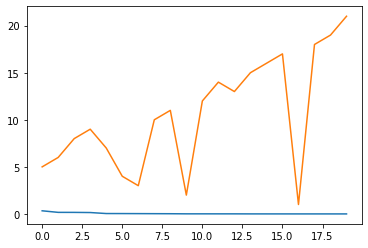

In [41]:
plt.plot(df)

In [42]:
from sklearn.linear_model import LinearRegression
lineModel = LinearRegression()
X_train = np.array(df.Price).reshape(len(df.Price),1)
Y_train = np.array(df.frequency).reshape(len(df.frequency),1)
lineModel.fit(X_train,Y_train)

LinearRegression()

In [47]:
coef = np.polyfit(df["Price"],df["frequency"],3)

In [60]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
y = np.polyval(coef,x) # Price demand probability distribution

r = x*y

In [61]:
r

array([-0.01439089,  0.07953765,  0.23977941,  0.43004723,  0.61977304,
        0.78410783,  0.90392167,  0.96580368,  0.96206207,  0.89072413,
        0.75553618,  0.56596366,  0.33719105,  0.09012191, -0.14862114])

Polynomial function has a demand probability distribution with increment from 0-5 dollars per hour and decrement from 5-15 dollars per hour, which is similar to the original data. Thus, we will stick with polynomial model.

# STEP 2 

For RL problem, we define it as the follows:

State: each price. We discrete the price space from 1 to 15, with step of 1.

Action: Increase the price by 1 or discrease the price by 1

Reward: Money earned * demand probability


In [93]:
import pandas as pd
import random
import time
#########Hyperparameters
epsilon = 0.5  # Greedy rate
alpha = 0.1  # learning rate
gamma = 0.8  # reward rate
#####
states = range(15)  
actions = ['increase_by_one', 'decrease_by_one']  
rewards = [-0.01439089,  0.07953765,  0.23977941,  0.43004723,  0.61977304,
        0.78410783,  0.90392167,  0.96580368,  0.96206207,  0.89072413,
        0.75553618,  0.56596366,  0.33719105,  0.09012191, -0.14862114] 
q_table = pd.DataFrame(data=[[0 for _ in actions] for _ in states], index=states, columns=actions)
def update_env(state):
    global states
    env = list('--------------T')
    if state != states[-1]:
        env[state] = '0'
    print('\r{}'.format(''.join(env)), end='')
    time.sleep(0.1)
def get_next_state(state, action):
    global states
    # l,r,n = -1,+1,0
    if action == 'increase_by_one' and state != states[-1]: 
        next_state = state + 1
    elif action == 'decrease_by_one' and state != states[0]:  
        next_state = state - 1
    else:
        next_state = state
    return next_state
def get_valid_actions(state):
    global actions  # ['left', 'right']
    valid_actions = set(actions)
    if state == states[-1]:  
        valid_actions -= set(['increase_by_one']) 
    if state == states[0]:  
        valid_actions -= set(['decrease_by_one'])  
    return list(valid_actions)
for i in range(1):
    # current_state = random.choice(states)
    current_state = 0
    update_env(current_state)  
    total_steps = 0  
    # while current_state != states[-1]:
    while total_steps <= 800:
        if (random.uniform(0, 1) > epsilon) or ((q_table.loc[current_state] == 0).all()):  
            current_action = random.choice(get_valid_actions(current_state))
        else:
            current_action = q_table.loc[current_state].idxmax()  
        next_state = get_next_state(current_state, current_action)
        next_state_q_values = q_table.loc[next_state, get_valid_actions(next_state)]
        q_table.loc[current_state, current_action] += alpha * (
                    rewards[next_state] + gamma * next_state_q_values.max() - q_table.loc[current_state, current_action])
        current_state = next_state
        update_env(current_state)  
        total_steps += 1  
    i+=1
    # print('\rEpisode {}: total_steps = {}'.format(i, total_steps), end='')  
    time.sleep(2)  
    # print('\r                                ', end='')  

-------0------T

In [94]:
print(q_table)

    increase_by_one  decrease_by_one
0          0.007954         0.000000
1          0.023978         0.000000
2          0.130811         0.000000
3          1.850634         0.027418
4          3.947660         0.668204
5          4.222755         3.450432
6          4.427734         4.096649
7          3.905235         4.390585
8          1.142937         4.239878
9          0.327367         2.158092
10         0.459164         0.416814
11         0.000000         0.564032
12         0.000000         0.000000
13         0.000000         0.000000
14         0.000000         0.000000


#Step 3: The bot now estimates a new ML model for demand as a function of price using the data generated in the exploration phase (this is very important since the bot does not have access to the original data set).


In [ ]:


# output  -------0------T
# price.  123456789012345 (from 1 - 15)

# From the code above, we can see the our Q-learning model suggest the price at $8 per hour.
# which is the price that has the highest price * demand probability

#Step 4: Find an optimal price policy based on this new model. How does your optimal price function learned by the RL bot compare with the original answer you got based on the full dataset? They will be close but most likely not the same. The trick now is to adjust the exploration phase length to ensure that you have answers close enough. You have now trained an RL bot.


Here, we adjust the different greedy rate to see how the price changes.

In [97]:
epsilon = 0.3  # Greedy rate

In [101]:
import pandas as pd
import random
import time
#########Hyperparameters
alpha = 0.1  # learning rate
gamma = 0.8  # reward rate
#####
states = range(15)  
actions = ['increase_by_one', 'decrease_by_one']  
rewards = [-0.01439089,  0.07953765,  0.23977941,  0.43004723,  0.61977304,
        0.78410783,  0.90392167,  0.96580368,  0.96206207,  0.89072413,
        0.75553618,  0.56596366,  0.33719105,  0.09012191, -0.14862114] 
q_table = pd.DataFrame(data=[[0 for _ in actions] for _ in states], index=states, columns=actions)
def update_env(state):
    global states
    env = list('--------------T')
    if state != states[-1]:
        env[state] = '0'
    print('\r{}'.format(''.join(env)), end='')
    time.sleep(0.1)
def get_next_state(state, action):
    global states
    # l,r,n = -1,+1,0
    if action == 'increase_by_one' and state != states[-1]: 
        next_state = state + 1
    elif action == 'decrease_by_one' and state != states[0]:  
        next_state = state - 1
    else:
        next_state = state
    return next_state
def get_valid_actions(state):
    global actions  # ['left', 'right']
    valid_actions = set(actions)
    if state == states[-1]:  
        valid_actions -= set(['increase_by_one']) 
    if state == states[0]:  
        valid_actions -= set(['decrease_by_one'])  
    return list(valid_actions)
for i in range(1):
    # current_state = random.choice(states)
    current_state = 0
    update_env(current_state)  
    total_steps = 0  
    # while current_state != states[-1]:
    while total_steps <= 200:
        if (random.uniform(0, 1) > epsilon) or ((q_table.loc[current_state] == 0).all()):  
            current_action = random.choice(get_valid_actions(current_state))
        else:
            current_action = q_table.loc[current_state].idxmax()  
        next_state = get_next_state(current_state, current_action)
        next_state_q_values = q_table.loc[next_state, get_valid_actions(next_state)]
        q_table.loc[current_state, current_action] += alpha * (
                    rewards[next_state] + gamma * next_state_q_values.max() - q_table.loc[current_state, current_action])
        current_state = next_state
        update_env(current_state)  
        total_steps += 1  
    i+=1
    # print('\rEpisode {}: total_steps = {}'.format(i, total_steps), end='')  
    time.sleep(2)  
    # print('\r                                ', end='')  

---------0----T

In [102]:
epsilon = 0.5  # Greedy rate

In [103]:
import pandas as pd
import random
import time
#########Hyperparameters
alpha = 0.1  # learning rate
gamma = 0.8  # reward rate
#####
states = range(15)  
actions = ['increase_by_one', 'decrease_by_one']  
rewards = [-0.01439089,  0.07953765,  0.23977941,  0.43004723,  0.61977304,
        0.78410783,  0.90392167,  0.96580368,  0.96206207,  0.89072413,
        0.75553618,  0.56596366,  0.33719105,  0.09012191, -0.14862114] 
q_table = pd.DataFrame(data=[[0 for _ in actions] for _ in states], index=states, columns=actions)
def update_env(state):
    global states
    env = list('--------------T')
    if state != states[-1]:
        env[state] = '0'
    print('\r{}'.format(''.join(env)), end='')
    time.sleep(0.1)
def get_next_state(state, action):
    global states
    # l,r,n = -1,+1,0
    if action == 'increase_by_one' and state != states[-1]: 
        next_state = state + 1
    elif action == 'decrease_by_one' and state != states[0]:  
        next_state = state - 1
    else:
        next_state = state
    return next_state
def get_valid_actions(state):
    global actions  # ['left', 'right']
    valid_actions = set(actions)
    if state == states[-1]:  
        valid_actions -= set(['increase_by_one']) 
    if state == states[0]:  
        valid_actions -= set(['decrease_by_one'])  
    return list(valid_actions)
for i in range(1):
    # current_state = random.choice(states)
    current_state = 0
    update_env(current_state)  
    total_steps = 0  
    # while current_state != states[-1]:
    while total_steps <= 200:
        if (random.uniform(0, 1) > epsilon) or ((q_table.loc[current_state] == 0).all()):  
            current_action = random.choice(get_valid_actions(current_state))
        else:
            current_action = q_table.loc[current_state].idxmax()  
        next_state = get_next_state(current_state, current_action)
        next_state_q_values = q_table.loc[next_state, get_valid_actions(next_state)]
        q_table.loc[current_state, current_action] += alpha * (
                    rewards[next_state] + gamma * next_state_q_values.max() - q_table.loc[current_state, current_action])
        current_state = next_state
        update_env(current_state)  
        total_steps += 1  
    i+=1
    # print('\rEpisode {}: total_steps = {}'.format(i, total_steps), end='')  
    time.sleep(2)  
    # print('\r                                ', end='')  

-------0------T

In [104]:
epsilon = 0.7  # Greedy rate

In [105]:
import pandas as pd
import random
import time
#########Hyperparameters
alpha = 0.1  # learning rate
gamma = 0.8  # reward rate
#####
states = range(15)  
actions = ['increase_by_one', 'decrease_by_one']  
rewards = [-0.01439089,  0.07953765,  0.23977941,  0.43004723,  0.61977304,
        0.78410783,  0.90392167,  0.96580368,  0.96206207,  0.89072413,
        0.75553618,  0.56596366,  0.33719105,  0.09012191, -0.14862114] 
q_table = pd.DataFrame(data=[[0 for _ in actions] for _ in states], index=states, columns=actions)
def update_env(state):
    global states
    env = list('--------------T')
    if state != states[-1]:
        env[state] = '0'
    print('\r{}'.format(''.join(env)), end='')
    time.sleep(0.1)
def get_next_state(state, action):
    global states
    # l,r,n = -1,+1,0
    if action == 'increase_by_one' and state != states[-1]: 
        next_state = state + 1
    elif action == 'decrease_by_one' and state != states[0]:  
        next_state = state - 1
    else:
        next_state = state
    return next_state
def get_valid_actions(state):
    global actions  # ['left', 'right']
    valid_actions = set(actions)
    if state == states[-1]:  
        valid_actions -= set(['increase_by_one']) 
    if state == states[0]:  
        valid_actions -= set(['decrease_by_one'])  
    return list(valid_actions)
for i in range(1):
    # current_state = random.choice(states)
    current_state = 0
    update_env(current_state)  
    total_steps = 0  
    # while current_state != states[-1]:
    while total_steps <= 200:
        if (random.uniform(0, 1) > epsilon) or ((q_table.loc[current_state] == 0).all()):  
            current_action = random.choice(get_valid_actions(current_state))
        else:
            current_action = q_table.loc[current_state].idxmax()  
        next_state = get_next_state(current_state, current_action)
        next_state_q_values = q_table.loc[next_state, get_valid_actions(next_state)]
        q_table.loc[current_state, current_action] += alpha * (
                    rewards[next_state] + gamma * next_state_q_values.max() - q_table.loc[current_state, current_action])
        current_state = next_state
        update_env(current_state)  
        total_steps += 1  
    i+=1
    # print('\rEpisode {}: total_steps = {}'.format(i, total_steps), end='')  
    time.sleep(2)  
    # print('\r                                ', end='')  

-0------------T

From the results above, we can see that different greedy rates may give the different final results in the end.

If the greedy rate is small (0.3 in the example above, the final result will keep jumping in each values because it keeps trying new possibilities for different options.

If the greedy rate is large (0.7 in the example above, the final result will stay in the first positive reward state which is $1.)

Thus, the greedy is critial in the reinforcement learning.